In [1]:
%pylab inline 
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import RK45
from scipy.interpolate import interp1d
from numpy.fft import * 
from scipy.signal import spectrogram
import os

Populating the interactive namespace from numpy and matplotlib


# Harmonic oscillation solving with RK45

In [2]:
def harm_osc(n):
    y_k = np.array([0,1])

    def harm_oszc(t,y):
        x, m = 0,1;
        dx = y[1];
        dv = -(y[0]/m);
        return dx, dv

    rk = RK45(harm_oszc,0,y_k, 1500, rtol=0.0000134);
    t = np.zeros(n)
    y = np.empty((np.shape(t)[0],rk.y.shape[0]))

    for i in range(n):
        t[i] = rk.t
        for j in range(rk.y.shape[0]):
            y[i,:]=rk.y
        rk.step()
        
    y1 = y[:,0]
    y2 = y[:,1]

    return t, y1, y2

In [ ]:
max(harm_osc(1500)[0])

In [ ]:
plot(harm_osc(100)[0],harm_osc(100)[1])
figsize(20,10)
xlabel('Time', fontsize = '25')
ylabel('Distance', fontsize = '25')
title('Harmonic oscillator with RK45',  fontsize = '35')
xticks(fontsize=24)
yticks(fontsize=24)
show
xlim(0,8)
#savefig('RK45.png')

In [ ]:
plot(harm_osc(100)[0],harm_osc(100)[2])  
figsize(20,10)
xlabel('Time', fontsize = '25')
ylabel('Velocity', fontsize = '25')
title('Harmonic oscillating motion',  fontsize = '35')
xticks(fontsize=24)
yticks(fontsize=24)
show

In [ ]:
plot(harm_osc(100)[1],harm_osc(100)[2])  
figsize(15,15)
xlabel('Distance [m]', fontsize = '25')
ylabel('Velocity [s]', fontsize = '25')
title('Harmonic oscillator phase space used by RK45',  fontsize = '35')
xticks(fontsize=10)
yticks(fontsize=10)
show
savefig('RK45phase.png', dpi=300, bbox_inches='tight')

# Interpolating the solution with even pitch in time, linear and cubic spline as well, to smooth the broken line

In [ ]:
def harm_int():
    #Linear solution
    f1 = interp1d(harm_osc(1000)[0],harm_osc(1000)[1] ,kind = 'linear')
    xnew = np.linspace(0,max(harm_osc(1000)[0]),1024)
    #Cubic solution
    f2 = interp1d(harm_osc(1000)[0],harm_osc(1000)[1] ,kind = 'cubic')
    return xnew, f1(xnew),f2(xnew)

In [ ]:
def harm_int_plot():   
    figsize(20,10)
    plot(harm_int()[0],harm_int()[1], label = "Linear")
    legend(loc='center')
    title("Interpolated harmonic oscillator", fontsize = '35')
    plot(harm_int()[0],harm_int()[2], label = "Cubic")
    xlabel('Time', fontsize = '25')
    ylabel('Distance', fontsize = '25')
    legend(loc='upper right', fontsize = '25')
    xticks(fontsize=24)
    yticks(fontsize=24)
    xlim(0,5.2)
    #savefig('interpolation.png')

In [ ]:
harm_int_plot()

### Harmonic oscillation solving with Euler-Cromer and Euler and calculate Energie

In [3]:

def solve(k,omega):
    
    #omega = 3
    x, v = 0,1
    periods = 30
    stepsPperiod = 50
    T =2*pi/omega
    dt = T/stepsPperiod
    t = 0
    a = 0
    en =0
        
    
    at = []
    xt = []
    vt = []
    tt = []
    en = []
    
    if (k == 1):
        
        for p in range (0,periods):
            for s in arange(0,stepsPperiod):

                tt.append(t)
                t += dt
                
                at.append(a)
                vt.append(v)
                xt.append(x)                
                
                
                a = -(omega * omega) * x              
                x += v * dt
                v += a * dt             
                


                en.append(0.5 * (v*v + omega*omega*x*x))
        return at, xt, vt, tt, en

    elif (k == 2):
        
        for p in range (0,periods):
            for s in arange(0,stepsPperiod):
                
                tt.append(t)
                t += dt

                at.append(a)
                xt.append(x)
                vt.append(v)
                
                
                a = -(omega * omega) * x
                v += a * dt
                x += v * dt
                

                       
                
                en.append(0.5 * (v*v + omega*omega*x*x))
        return at, xt, vt, tt, en        
    else :
        print("Choose a method, if you give 1 to variable 'k' is Euler, 2 is Euler-Cromer")

In [ ]:
figsize(20,10)
plot(solve(1,5)[3],solve(1,5)[1])
legend(loc='center')
title("Harmonic oscillator with Euler method", fontsize = '35')
xlabel('Time', fontsize = '25')
ylabel('Distance', fontsize = '25')
legend(loc='upper left', fontsize = '25')
xticks(fontsize=24)
yticks(fontsize=24)
show
#savefig('euler.png')

In [ ]:
figsize(20,10)
plot(solve(2,5)[3],solve(2,5)[1], label = 'euler')
plot(t,analX)
legend(loc='center')
title("Harmonic oscillator with Euler-Cromer method", fontsize = '35')
xlabel('Time', fontsize = '25')
ylabel('Distance', fontsize = '25')
legend(loc='upper left', fontsize = '25')
xticks(fontsize=24)
yticks(fontsize=24)
show
xlim(0,2)
#savefig('euler.png')

In [ ]:
figsize(15,15)
plot(solve(2)[2],solve(2)[1])
legend(loc='center')
title("Harmonic oscillator phase space", fontsize = '35')
xlabel('Distance', fontsize = '25')
ylabel('Velocity', fontsize = '25')
legend(loc='upper left', fontsize = '25')
xticks(fontsize=10)
yticks(fontsize=10)
show
#savefig('eulercromerphase.png', dpi=300, bbox_inches='tight')


In [84]:
analX = []
analV = []


In [85]:


def analX(om,t,x0,v0):
    return (x0*cos(om*t) + v0/om*sin(om*t))

def analV(om,t,x0,v0):
    return -x0*om*sin(om*t) + v0*cos(om*t)

def analE(om,t,x0,v0):
    return 0.5 *(v0*v0 + om*om*x0*x0)



t = linspace(0,62.789965169746296,1500)
#RK45
#t = linspace(0,141.69937551933288,500)
#t = linspace(0,50, 500)
#t = linspace(0,567.7884440536336, 1500)

In [86]:
analX = analX(3,t,0,1)
analV = analV(3,t,0,1)

#analE = analE(5,t,analX,analV)

In [87]:
differenc = []
differenc2 = []
for i in range(0,1500,1):
    differenc2.append((abs(solve(1,3)[2][i])-abs(analV[i]))/abs(analV[i]))
    differenc.append((abs(solve(1,3)[2][i])-abs(analV[i])))

In [66]:
absol = []

In [67]:
for i in range(0,1500,1):
    absol.append(abs(differenc[i]))

In [68]:
max(absol)
#min(absol)
#shape(differenc)

110994.96457288355

In [83]:
max(solve(1,3)[3])
#max(t)
#max(harm_osc(500)[0])

62.789965169746296

/usr/lib/python3/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'under left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


(array([-200000.,       0.,  200000.,  400000.,  600000.,  800000.,
        1000000., 1200000., 1400000., 1600000., 1800000.]),
 <a list of 11 Text yticklabel objects>)

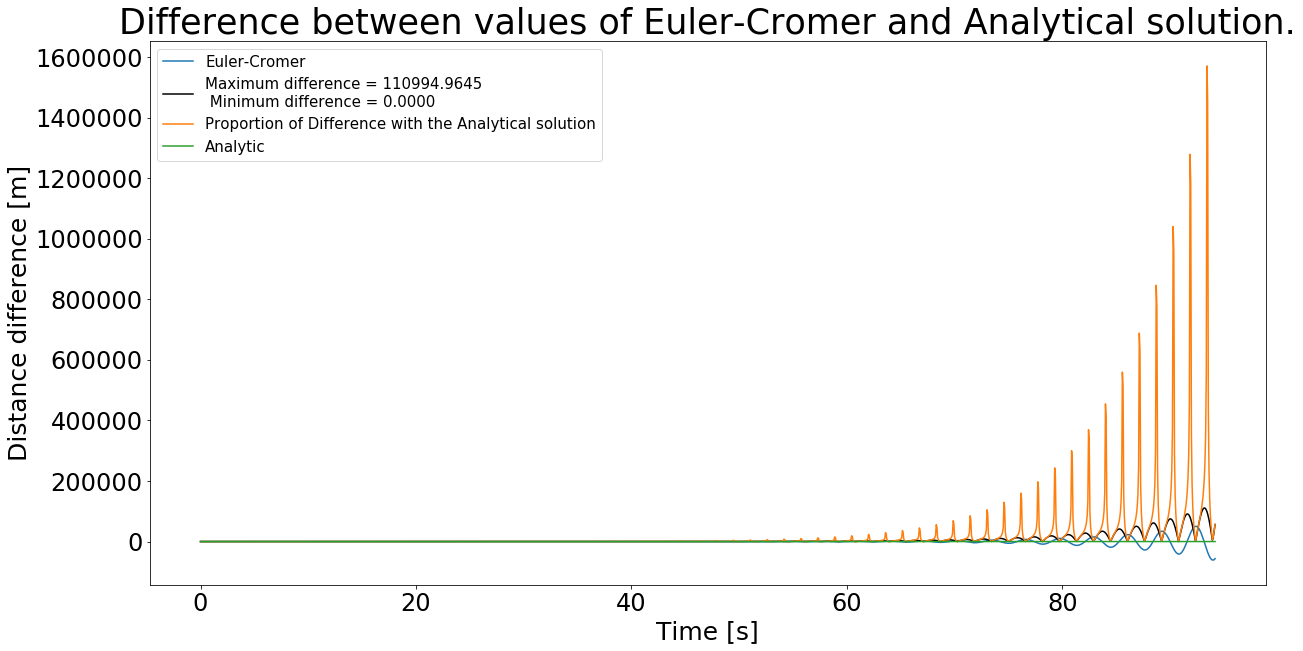

In [61]:
figsize(20,10)
xlabel('Time [s]', fontsize = '25')
ylabel('Distance difference [m]', fontsize = '25')
title('Difference between values of Euler-Cromer and Analytical solution.',  fontsize = '35')

#plot(harm_osc(1500)[0][200],harm_osc(1500)[1][200], label = 'RK45')
plot(t, solve(1,2)[1] , label = 'Euler-Cromer')
plot(t, differenc, label = 'Maximum difference = 110994.9645 \n Minimum difference = 0.0000',color = 'black')
plot(t, differenc2, label = 'Proportion of Difference with the Analytical solution')

plot(t, analX, label = 'Analytic')

legend(loc='under left',fontsize=15)
xticks(fontsize=24)
yticks(fontsize=24)
#xlim(0,5)
#ylim(-1,1)
#savefig('EulerandAnalyticalom2all.png.', dpi=300, bbox_inches='tight')

/usr/lib/python3/dist-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Unrecognized location 'under left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


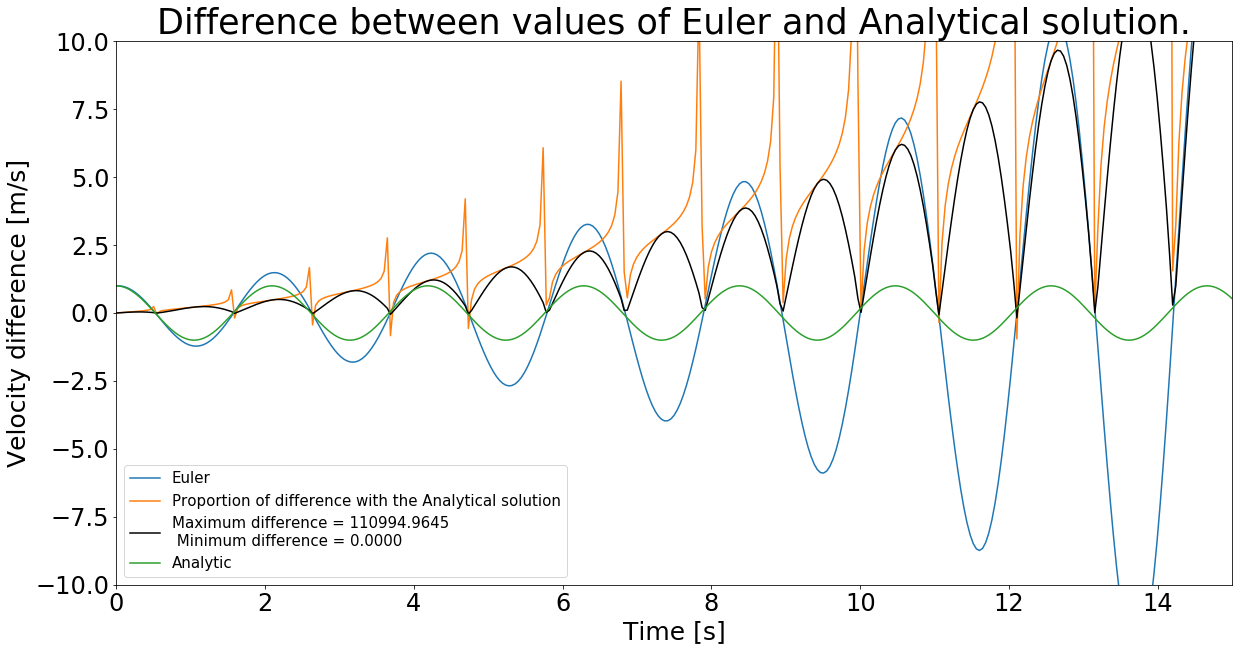

In [89]:
figsize(20,10)
xlabel('Time [s]', fontsize = '25')
ylabel('Velocity difference [m/s]', fontsize = '25')
title('Difference between values of Euler and Analytical solution.',  fontsize = '35')


#plot(harm_osc(500)[0],harm_osc(500)[2], label = 'RK45')
plot(t, solve(1,2)[2] , label = 'Euler')
plot(t, differenc2, label = 'Proportion of difference with the Analytical solution')

plot(t, differenc, label = 'Maximum difference = 110994.9645 \n Minimum difference = 0.0000', color ='black')
plot(t, analV, label = 'Analytic')

legend(loc='under left',fontsize=15)
xticks(fontsize=24)
yticks(fontsize=24)
xlim(0,15)
ylim(-10,10)
savefig('veloEulerom3.png', dpi=300, bbox_inches='tight')

In [ ]:

plot(t,analE, label = 'anal')

In [ ]:
figsize(20,10)
xlabel('Time [s]', fontsize = '25')
ylabel('Energy [J]', fontsize = '25')
title('Energies of the Euler-Cromer and Analytic solution. ',  fontsize = '35')
plot(t,analE, label = 'Analytic solution of energy')
plot(solve(2,1)[3],solve(2,1)[4],label = 'Euler-Cromer method, $\omega = 1$')
plot(solve(2,2)[3],solve(2,2)[4],label = 'Euler-Cromer method, $\omega = 2$')
plot(solve(2,3)[3],solve(2,3)[4],label = 'Euler-Cromer method, $\omega = 3$')
plot(solve(2,4)[3],solve(2,4)[4],label = 'Euler-Cromer method, $\omega = 4$')
plot(solve(2,5)[3],solve(2,5)[4],label = 'Euler-Cromer method, $\omega = 5$')
legend(loc='center right',fontsize=25)
xticks(fontsize=24)
yticks(fontsize=24)
#xlim(0,2)
#ylim(-1,1)
#savefig('Energy values of analytic and Euler-Cromersolution.png', dpi=300, bbox_inches='tight')

In [ ]:
a = [1,2,3,4,5,15,25]
b = [45.5974, 22.7987,15.199144,11.39935,9.11948,3.039828,1.82389]
c = [0.040935,0.020467,0.013645,0.010234,0.008187,0.002729,0.0016374]

In [ ]:
figsize(20,10)
#xlabel('$\omega$', fontsize = '25')
#ylabel('', fontsize = '25')
#title('Maximum differences depending on $\omega$',  fontsize = '35')
#legend(loc='center right',fontsize=25)
#xticks(fontsize=24)
#yticks(fontsize=24)

fig, ax = plt.subplots( figsize=(12, 7))
plot(a,c)
ax.scatter(a, c)  
for i, txt in enumerate(c):
    ax.annotate(txt, (a[i], c[i]), fontsize=15)
    

ax.set_xlabel(r'$\omega$', fontsize=18)
ax.set_ylabel('Maximum differences [m]', fontsize=18)
fig.suptitle('Maximum differences depending on $\omega$',  fontsize = '35')    
plt.tick_params(axis='both', which='major', labelsize=18)

savefig('Maximum diff depending on omega Euler-Cromer .png', dpi=300, bbox_inches='tight')